# 1장 - 얼굴인식

In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

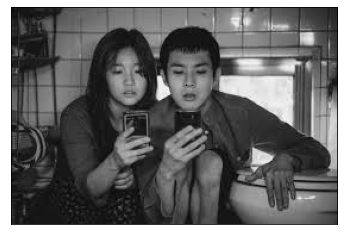

In [7]:
image = cv2.imread('image/bong.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
xml = 'haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(xml)
faces = face_cascade.detectMultiScale(gray, 1.2, 5)

print("Number of faces detected: " + str(len(faces)))

Number of faces detected: 2


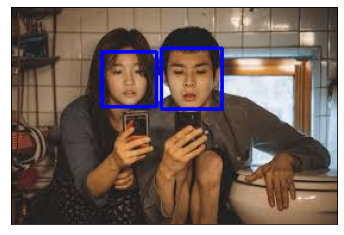

In [9]:
if len(faces):
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

# 2장 - 실시간 얼굴 탐지

In [12]:
import numpy as np
import cv2

xml = 'haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(xml)

cap = cv2.VideoCapture(0) # 노트북 웹캠을 카메라로 사용
cap.set(3,640) # 너비
cap.set(4,480) # 높이

while(True):
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1) # 좌우 대칭
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray,1.05, 5)
    print("Number of faces detected: " + str(len(faces)))

    if len(faces):
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        
    cv2.imshow('result', frame)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27: # Esc 키를 누르면 종료
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
